In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import ipaddress
from aimlsse_api.client import GroundDataClient, SatelliteDataClient

In [2]:
ground_data_client = GroundDataClient(ipaddress.ip_address('127.0.0.1'), 8000)

In [3]:
locations = ground_data_client.queryPosition(['EDDF', 'EGLL'])
print(locations)

     station   latitude  longitude  elevation                   geometry
2212    EDDF  50.036521   8.561268   110.9472   POINT (8.56127 50.03652)
2434    EGLL  51.470600  -0.461941    25.2984  POINT (-0.46194 51.47060)


In [4]:
satellite_data_client = SatelliteDataClient(ipaddress.ip_address('127.0.0.1'), 8010)

In [5]:
grid_cells = satellite_data_client.queryContainingGeometry(locations)
print(grid_cells)

                                            geometry   Name  \
0  GEOMETRYCOLLECTION Z (POLYGON Z ((-1.53212 52....  30UXC   
1  GEOMETRYCOLLECTION Z (POLYGON Z ((7.58809 50.5...  32UMA   

                                         Description  
0  TILE PROPERTIES<br><table border=0 cellpadding...  
1  TILE PROPERTIES<br><table border=0 cellpadding...  


In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
output_dir = 'results/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

C:\Users\erikw\AppData\Local\Temp\ipykernel_3552\2206605534.py:5: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(locations.longitude, locations.latitude, marker='x', s=10, linewidth=0.5, color='#E74C3C', edgecolor='white', zorder=3)


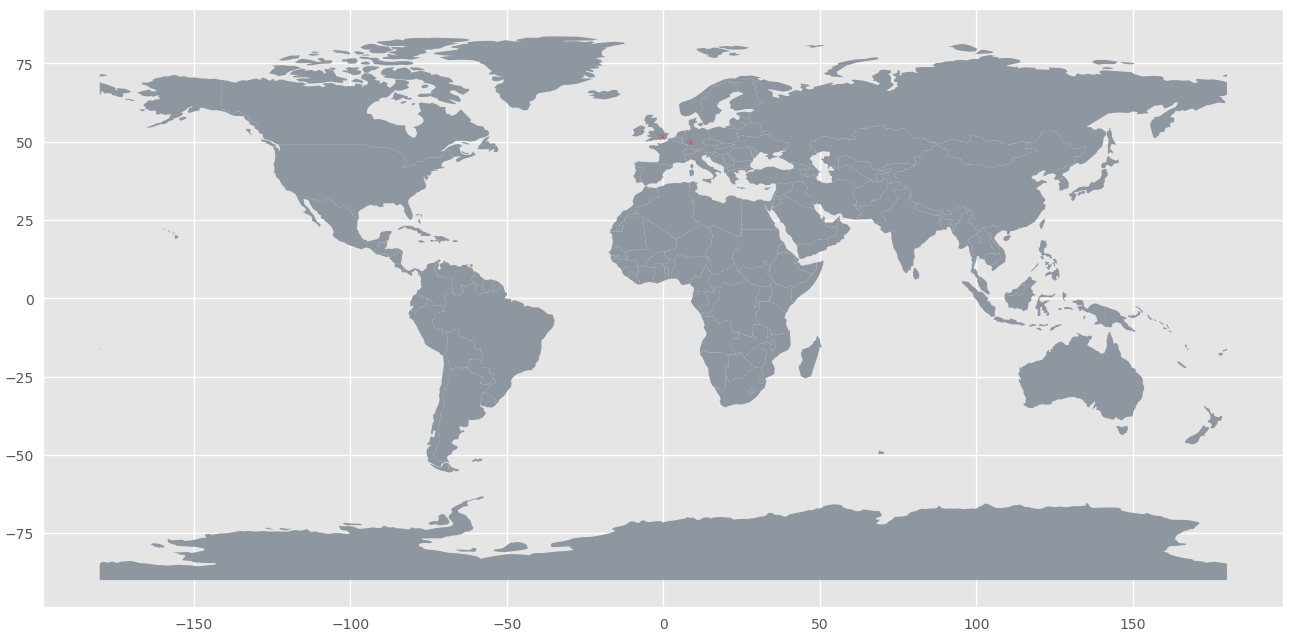

In [8]:
with plt.style.context(("seaborn", "ggplot")):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(16,9), color='#8e979f', zorder=1);
    grid_cells.buffer(0).boundary.plot(ax=ax, edgecolor='black', alpha=0.6, linewidth=0.1, zorder=2)
    ax.scatter(locations.longitude, locations.latitude, marker='x', s=10, linewidth=0.5, color='#E74C3C', edgecolor='white', zorder=3)
    plt.savefig(f'{output_dir}locations_and_grid_cells_view.svg', bbox_inches='tight', dpi=150, format='svg')